### Codio Activity 16.5: Comparing Margins in Classifiers

This activity focuses on comparing different linear classification models and their margins.  You will draw linear boundaries on a sample dataset using algebra and compare their margins.  This is an intuitive introduction to choosing a maximum margin classifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(cluster_std=2.0, centers = 2, random_state=42)

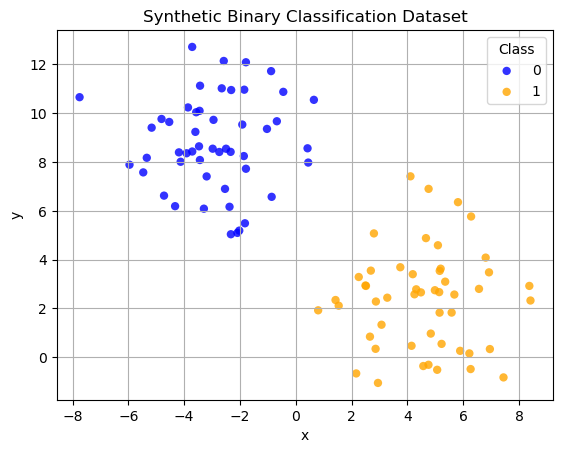

In [3]:
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X[y == label][:, 0], X[y == label][:, 1], c=color, label=label,
               alpha=0.8, edgecolors='none')
ax.legend(title = 'Class')
ax.set_title('Synthetic Binary Classification Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

In [4]:
df = pd.DataFrame(X, columns = ['x', 'y'])
df['class'] = y
df.head()

,x,y,class
0,-3.467546,8.642968,0
1,6.805981,4.080774,1
2,-3.597963,9.236131,0
3,6.283999,5.766756,1
4,5.094799,4.587455,1


### Problem 1

#### Linear Boundary through Given Points

Create a linear function that goes through the two points where:

- $(x_0, y_0)$ corresponds to the point in class 1 with the lowest $x$ value. 
- $(x_1, y_1)$ corresponds to the point in class 0 with the highest $x$ value.

Define your points as `x0, y0` and `x1, y1`, determine the slope and write the equation by completing the function `boundary_1` below.

**RECALL**: A linear function can be determined as:

$$y = m(x_0 - x) + y_0$$

where $m$ is the slope (`slope0`) and $(x_0, y_0)$ is a point on the line.

Assign each of these as floats to their respective variables below.  Uncomment the code to visualize your completed boundary.

HINT:  use " df.loc[df['x'] == x1_]  ", or use "  ['y'].values[0]  "

In [5]:
x0 = df[df['class'] == 1]['x'].min()
x1 = df[df['class'] == 0]['x'].max()

y0 = df.loc[df['x'] == x0]['y'].values[0]
y1 = df.loc[df['x'] == x1]['y'].values[0]
slope0 = (y1 - y0)/(x1 - x0)
def boundary_1(x):
    return slope0*(x0 - x) + y0

In [6]:
print(x0, y0)
print(x1, y1)

0.8023364056300184 1.9201419330422982
0.6492280079620327 10.54915558650414


(-2.0, 15.0)

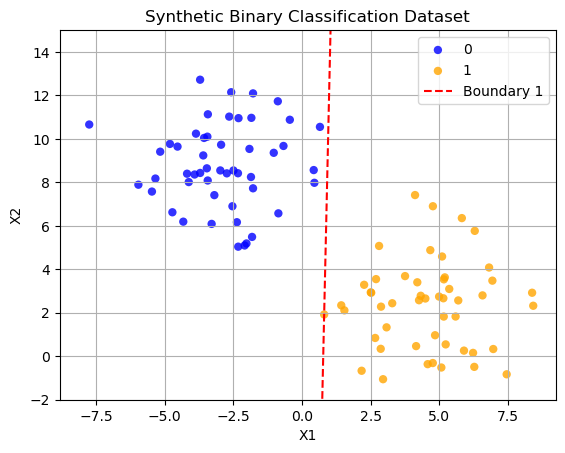

In [7]:
x = np.linspace(-8, 8, 10000)
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X[y == label][:, 0], X[y == label][:, 1], c=color, label=label,
               alpha=0.8, edgecolors='none')
ax.set_title('Synthetic Binary Classification Dataset')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid(True)
ax.plot(x, boundary_1(x), '--r', label = 'Boundary 1')
ax.legend()
ax.set_ylim(-2, 15)

### Problem 2

#### Linear Boundary through Given Points


Create a linear function that goes through the two points where:

- $(x_2, y_2)$ corresponds to the point in class 0 with the lowest $y$ value. 
- $(x_3, y_3)$ corresponds to the point in class 1 with the highest $y$ value.

Define your points as `x2, y2` and `x3, y3`, determine the slope and write the equation by completing the function `boundary_2` below.


In [9]:
y2 = df[df['class'] == 0]['y'].min()
y2

5.039148298996538

In [10]:
y3 = df[df['class'] == 1]['y'].max()
y3

7.41350801711997

In [17]:
x2 = df.loc[df['y']== y2]['x'].values[0]
x2

np.float64(-2.3256760699817454)

In [19]:
x3 = df.loc[df['y'] == y3]['x'].values[0]
x3

np.float64(4.110565169752189)

In [20]:
slope1 = (y2-y3)/(x2-x3)
slope1

np.float64(0.3689047115675833)

In [21]:
def boundary_2(x):
    return y2 - slope1 * (x2 - x)

In [22]:
print((x2, y2))
print((x3, y3))
print(slope1)

(np.float64(-2.3256760699817454), 5.039148298996538)
(np.float64(4.110565169752189), 7.41350801711997)
0.3689047115675833


(-8.0, 8.0)

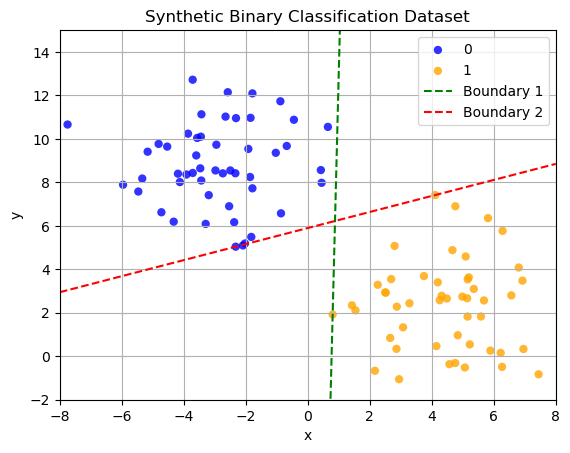

In [23]:
x = np.linspace(-8, 8, 10000)
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X[y == label][:, 0], X[y == label][:, 1], c=color, label=label,
               alpha=0.8, edgecolors='none')
ax.set_title('Synthetic Binary Classification Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.plot(x, boundary_1(x), '--g', label = 'Boundary 1')
ax.plot(x, boundary_2(x), '--r', label = 'Boundary 2')
ax.legend()
ax.set_ylim(-2, 15)
ax.set_xlim(-8, 8)

### Problem 3

#### Intersection of Boundaries

Below, the `scipy.optimize` module is used to determine the intersection of the boundaries. The $x$ coordinate of the intersection point is assigned as `xint`. Use this $x$ coordinate to determine the $y$ coordinate of the point of intersection by evaluating the intersection function `intersection(xint)`.

Assign the $y$ coordinate of the intersection point to `yint` below.

In [24]:
from scipy.optimize import root

In [25]:
def intersection(x):
    '''
    This function can be used to determine
    the intersection of boundary_1 and boundary_2
    '''
    return boundary_1(x) - boundary_2(x)

xint = root(intersection, 2)['x'] #x value of intersection point

Hint: 

This problem aims to find the point where two linear boundaries intersect. <br />
In this case, we have two linear boundaries represented by the functions `boundary_1(x)` and `boundary_2(x)`.
    
To find the intersection point, we need to find the value of $x$ where these two functions are equal. Mathematically, this can be represented as finding the root of the equation. Please refer to the given `intersection` function above and the equation.

Make use of the `intersection(xint)` to find the $y$ coordinate of the intersection point and assign the result to `yint` variable below.

In [26]:
yint = intersection(xint)

print((xint, yint))

(array([0.87865269]), array([-2.66453526e-15]))


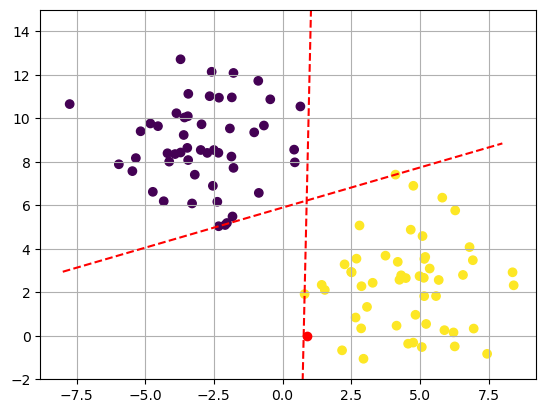

In [27]:
plt.scatter(df['x'], df['y'], c = df['class'])
plt.plot(x, boundary_2(x), '--r')
plt.plot(x, boundary_1(x), '--r')
plt.plot(xint, yint, 'ro')
plt.ylim(-2, 15)
plt.grid();

### Problem 4

#### Linear Boundary Compromise

Now, build a linear function that uses a slope that is the determined by the points:

$$(x_4, y_4) = (x0 + x2)/2, (y0 + y2)/2$$
$$(x_5, y_5) = (x1 + x3)/2, (y1 + y3)/2$$

and goes through the intersection point of the lines `boundary_1` and `boundary_2`. 

In [28]:
x4 = (x0 + x2)/2
x5 = (x1 + x3)/2
y4 = (y0 + y2)/2
y5 = (y1 + y3)/2
slope3 = (y5 - y4)/(x5 - x4)
def boundary_3(x):
    return -slope3*(xint - x) + boundary_1(xint)

print((x3, y3))
print((x4, y4))

(np.float64(4.110565169752189), 7.41350801711997)
(np.float64(-0.7616698321758635), np.float64(3.4796451160194177))


(-7.5, 10.0)

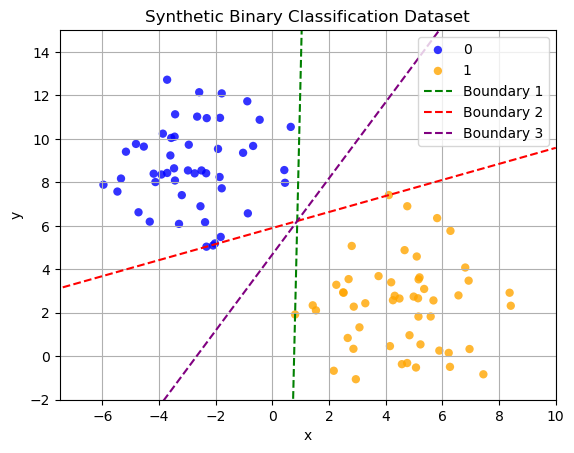

In [29]:
x = np.linspace(-10, 10, 100)
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X[y == label][:, 0], X[y == label][:, 1], c=color, label=label,
               alpha=0.8, edgecolors='none')
ax.set_title('Synthetic Binary Classification Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.plot(x, boundary_1(x), '--g', label = 'Boundary 1')
ax.plot(x, boundary_2(x), '--r', label = 'Boundary 2')
ax.plot(x, boundary_3(x), '--', color = 'purple', label = 'Boundary 3')
ax.legend()
ax.set_ylim(-2, 15)
ax.set_xlim(-7.5, 10)

### Problem 5

#### Selecting the Optimal Decision Boundary

Despite all three examples being near perfect linear boundaries for the two classes, which boundary do you think would be the best for predicting new data points?  Assign your answer as a string to `ans5` below.

```
a. boundary_1
b. boundary_2
c. boundary_3
d. all are same
```


In [30]:
ans5 = 'c'

### Codio Activity 16.6: Maximum Margin Classifiers

This activity focuses on basic maximum margin classifiers with the help of scikitlearn's `SVC` estimator.  Soon, you will dive deeper into the mechanics of the Support Vector Classifier.  To get started however, you will use this as many other estimators and visualize the margins for the resulting classifier.  Specifically, we will examine the **support vectors** and see how we can use `SVC` to visualize boundaries for the maximum margin classifier.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)


In [31]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### The Data

You will use the same synthetic data from the previous assignment and compare how the maximum margin classifier resulting from `SVC` looks under basic settings.  

In [32]:
X, y = make_blobs(cluster_std=2.0, centers = 2, random_state=42)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

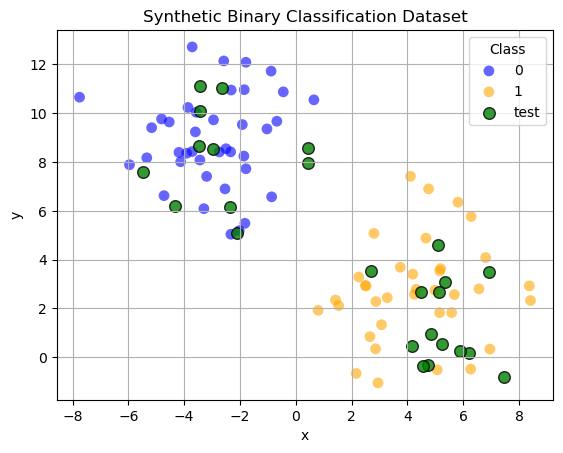

In [35]:
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X_train[y_train == label][:, 0], X_train[y_train == label][:, 1], c=color, label=label,
               alpha=0.6, edgecolors='none', s = 60)
ax.scatter(X_test[:, 0], X_test[:, 1], c='green', label='test',
               alpha=0.8, edgecolors='black', s = 70)
    
ax.legend(title = 'Class')
ax.set_title('Synthetic Binary Classification Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

### Problem 1

#### Fitting the `SVC`

Below, instantiate and fit the `SVC` estimator to your training data, assigned to the variable `svc_1` below.  To use a linear decision boundary be sure to set the `kernel = 'linear'`.  After fitting, examine the **support vectors** with the `.support_vectors_` attribute of the `svc_1`, and assign this as a numpy array to `support_vectors` below.    Uncomment the code to visualize the points that determine these support vectors.

In [36]:
svc_1 = SVC(kernel = 'linear').fit(X_train, y_train)
svc_1

SVC(kernel='linear')

In [37]:
support_vectors = svc_1.support_vectors_
support_vectors

array([[-0.8641078 ,  6.57259883],
       [ 0.80233641,  1.92014193],
       [ 4.11056517,  7.41350802]])

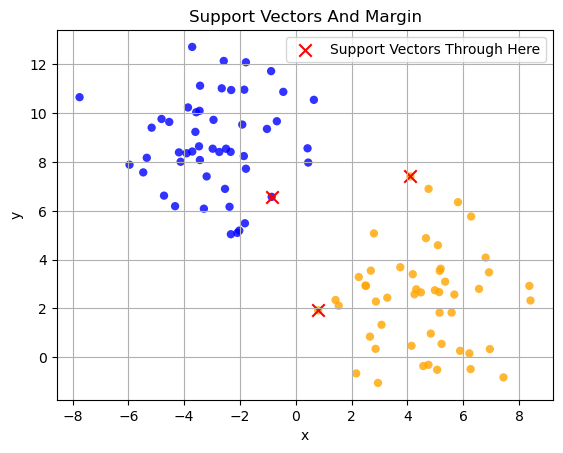

In [38]:
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X[y == label][:, 0], X[y == label][:, 1], c=color, 
               alpha=0.8, edgecolors='none')
ax.set_title('Support Vectors And Margin')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], color = 'red', s = 80, marker = 'x', label = 'Support Vectors Through Here')
ax.grid(True)
ax.legend()

### Problem 2

#### Examining the resulting Margin

As seen above, the results of the fit `SVC` contain points through which the **support vectors** pass.  The result from solving the constrained optimization problem seen in the videos.  The points that determine this maximum margin pass through the support vectors.  Further, because these vectors (here lines) are parallel to one another they share a slope.  Using the `support_vectors` determine the slope of these lines and assign this to `slope2` below.  This will complete the functions `lower` and `upper` that determine a line between the two lower points for the support vectors and the one upper point.  Uncomment the code to visualize your results.

In [39]:
slope2 = (support_vectors[1, 1] - support_vectors[2, 1])/(support_vectors[1, 0] - support_vectors[2, 0]) 

def lower(x):
    return slope2*(x - support_vectors[2, 0]) + support_vectors[2, 1]
def upper(x):
    return slope2*(x - support_vectors[0, 0]) + support_vectors[0, 1]

Text(0.5, 1.0, 'Support Vectors')

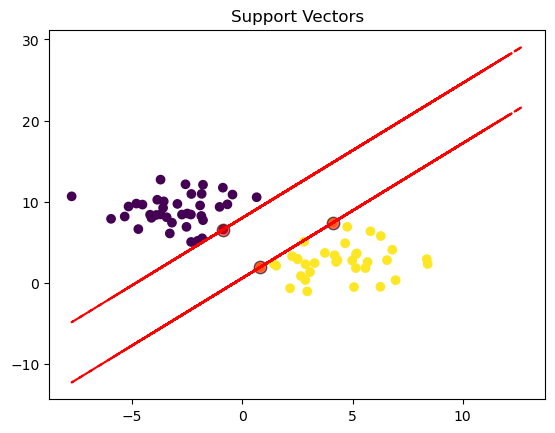

In [40]:
plt.plot(X, lower(X), '--r')
plt.plot(X, upper(X), '--r')
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], alpha = 0.6,color = 'red', s = 80, edgecolor = 'black')
plt.title('Support Vectors')

### Problem 3

#### Using the `decision_function` approach

Similar to what you found using the slope of the line through the **support vectors**, the fit estimator can return information on these boundaries directly using the `.decision_function`.  Below, the `decision_function` is used to generate a contour plot of the support vectors and their midpoint.  The test data are plotted against the training data and support vectors.  

Based on this visualization did the Maximum Margin classifier misclassify any points? Note that the black line between the red support vectors is the decision boundary. Assign your answer as a boolean to `ans3` below.

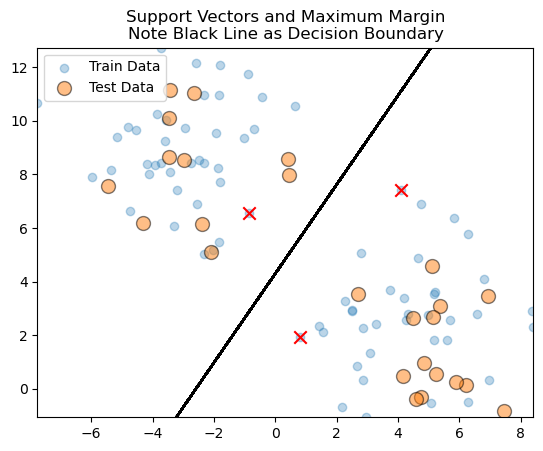

In [41]:
#Grid of points to plot decision boundaries 
XX, YY = np.meshgrid(X_train[:, 0], X_train[:, 1])
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#Output from grid of points based on decision function
Z = svc_1.decision_function(xy).reshape(XX.shape)
#Plots of points and support vectors
fig, ax = plt.subplots()
ax.contour(XX, YY,  Z, levels = [0], colors = ['black'])
ax.scatter(X_train[:, 0], X_train[:, 1], alpha = 0.3, label = 'Train Data')
ax.scatter(X_test[:, 0], X_test[:, 1], s = 100, alpha = 0.5, edgecolor = 'black', label = 'Test Data')
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], color = 'red', s = 80, marker = 'x')
ax.legend(loc = 'upper left')
ax.set_title('Support Vectors and Maximum Margin\nNote Black Line as Decision Boundary');

In [42]:
ans3 = False

### Comparing Other Boundaries

Below, plotting both a `LogisticRegression` and a Quadratic boundary for a maximum margin classifier are shown.  Note how similar the linear `SVC` and `LogisticRegression` estimators are, while the quadratic boundary seems to be less effective than a linear boundary.  

Text(0.5, 1.0, 'Logistic Regression (red) vs. Linear SVC (black)')

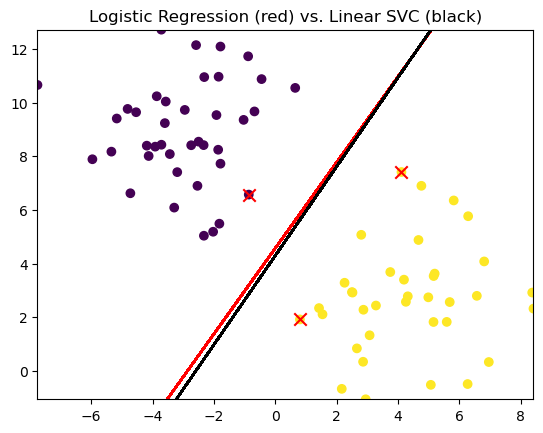

In [43]:
lgr = LogisticRegression().fit(X_train, y_train)
Z2 = lgr.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY,  Z2, levels = [0], colors = ['red'])
plt.contour(XX, YY,  Z, levels = [0], colors = ['black'])
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color = 'red', s = 80, marker = 'x')
plt.title('Logistic Regression (red) vs. Linear SVC (black)')

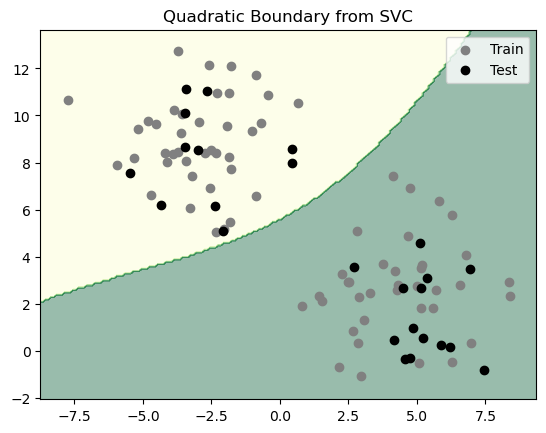

In [44]:
svc2 = SVC(kernel='poly').fit(X_train, y_train)
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z3 = svc2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy,  Z3, cmap = 'YlGn', alpha = 0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c = 'grey', label = 'Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c = 'black', label = 'Test')
plt.legend()
plt.title('Quadratic Boundary from SVC');